# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
The Boston housing market is highly competitive, and there is a desire to be the best real estate agent in the area. To compete with peers, I decided to leverage a few basic machine learning concepts to assist myself and a client with finding the best selling price for their home. I’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. I will build an optimal model based on a statistical analysis with the tools available. This model will then used to estimate the best selling price for my client’s home.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, I will quickly investigate a few basic statistics about the dataset you are working with. In addition, I'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing myself with the data through an explorative process is a fundamental practice to help better understand my results.

## Step 1
In the code block below, I will the imported `numpy` library to calculate the desired statistics.

In [2]:
# Number of houses in the dataset
total_houses = np.shape(housing_features)[0]

# Number of features in the dataset
total_features = np.shape(housing_features)[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, I will choose three that I feel are significant and give a brief description for each of what they measure.*

**Answer: ** Out of the features available for each data point as listed on the UCI Machine Learning Respository site for the housing dataset, there are three that I believe are significant features of the housing value:

1. **CRIM**: per capita crime rate by town
I believe that this is an important feature, since it could significantly impact the pricing of a house. Areas in which crime is high are unfavorable, and houses would be priced lower since demand is low. On the other hand, areas in which crime is low are favored, and houses would be priced higher since demand is high. This is related to the safety of living in the house, which is an important factor to prospective buyers.

2. **LSTAT**: % lower status of the population
I believe that this is a significant feature, since it could also significantly impact the pricing of a house. In areas with a large proportion of low-status individuals, housing may be cheaper so as to afford a place to live. For example, rural areas will have cheap housing to accomodate for the demographic, and since richer individuals would not want to live in those areas. On the other hand, areas with highly affluent individuals would have higher-priced housing since these areas may be more developed with better amenities.

3. **NOX**: nitric oxides concentration (parts per 10 million)
Finally, I believe that NOX concentration is important in predicting the housing value. This is because the compound is dangerous if inhaled in large quantities, and areas with high concentrations would be generally avoided. This particular feature is interesting since it may only be considered when values are high: individuals may not consciously choose areas based on low values, but rather avoid areas based on high values. Nevertheless, the concentration will have an impact on the housing price.

All of the features I chose seem to be universal, as opposed to some other features such as pupil-teacher ratio (PTRATIO) or proportion of non-retail business acres per town (INDUS) which may be explanatory for some kinds of individuals, but not others.

## Question 2
*Using the client's feature set `CLIENT_FEATURES`, which values correspond with the features chosen above?* 

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: ** The client's feature set shows that their house is in an area with **11.95%** crime, **0.659** parts per million nitrous oxide, and **12.13%** of the population in the lower-class.

# Evaluating Model Performance
In this second section of the project, I will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in predictions.

## Step 2
In the code block below, the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

In [4]:
# Put any import statements you need for this code block here
from sklearn import cross_validation
import random

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    c = zip(X, y)
    random.shuffle(c)
    X = [e[0] for e in c]
    y = [e[1] for e in c]
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** We split the data into training and testing subsets for our model to properly assess whether or not our model can go out into the real world and predict new data. If we only used testing data, we would have no data to train, so this wouldn't even allow us to build a model. If we only used training data, we would build a model that runs the risk of only being accurate for that set of data and not being able to accurately predict other data points. In other words, interpolation and extrapolation would not be possible. We therefore use the split to both develop our model and evaluate or validate its accuracy.

## Step 3
In the code block below, the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

I will first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions.

In [5]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** I found that the MSE would be the most appropriate performance metric for predicting housing prices and analyzing the total error. I first short-listed either the MSE or the MAE as being appropriate, since the data being dealt with is quantitative and not categorical. Then, I noted that the mean squared error provides a better indication of accuracy measurement since errors are all positive, and larger errors are exaggerated more due to the squaring. This is also a common metric used when judging regressions, and so I believed it would apply well to this study.

## Step 4 (Final Step)
In the code block below, the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [6]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better = False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring = scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** The grid search algorithm finds the optimized parameters to use in the estimator. It does this by iterating through all possible combinations of provided parameters (a parameter grid) in order to determine the combination yielding the best estimator. It is applicable in cases when the model has many parameters to consider, and when manual tuning is inefficient or expensive.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** Cross-validation is a process through which data split for testing and training purposes. This is done to maximize the certainty of our validity claims, and to prevent against overfitting. One kind of cross-validation technique is ``k``-fold CV, in which we use as much data as possible to both train and test our model. It is performed using an algorithm in which data is divided into ``k`` equally-sized bins. The data is then analyzed where ``1`` bin is used as the testing data and the other ``k-1`` bins are used as training data. This is done ``k`` times, such that all data is used for training and testing purposes. It is helpful when using grid search to look at all possible models (parameters) and determine its validity on test data. This helps gauge which model will best predict real data, not just which model has the least error which can often result in overfitting.

# Learning Curves and Model Complexity
We will now calculate the performance of several models and learn about their efficacy using visual representations. These graphs are of learning curves and model complexity, which lend insight towards relative strengths of models.

In [7]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [69]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, we'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


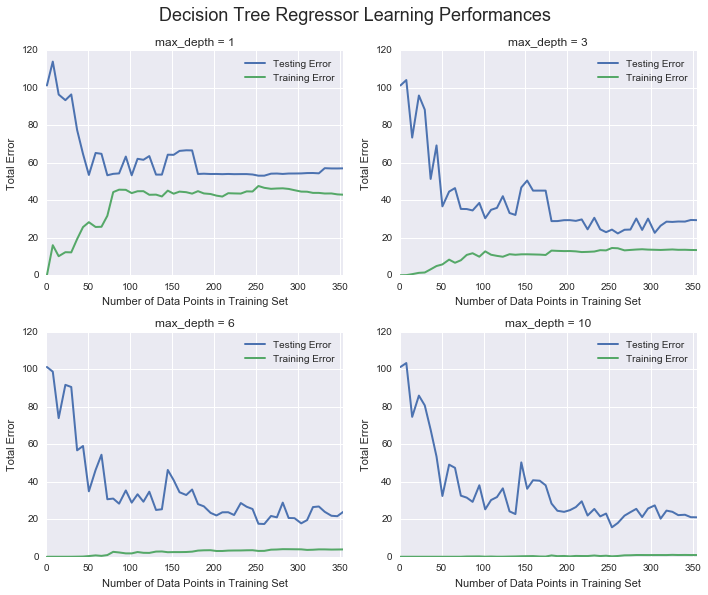

In [9]:
import seaborn as sns

learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: ** The max depth for the chosen model is 1. As the size of this training set increases, the training error initially increases quite quickly and eventually plateaus. On the other hand, the testing error initially decreases and eventually plateaus. Both errors stabilize at quite high values (~60 for testing and ~40 for training).

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: ** When the max depth is 1, the model seems to suffer from high bias. This is because as more data points are added to the training set, there is no difference in the prediction error, suggesting that underfitting has occurred. The model is oversimplified, and cannot accurately predict further complexity in the data after a certain point. On the other hand, when the max depth is 10, the model seems to suffer from high variance. This is because the training error is almost 0 for the entire training set, whereas there is still a gap between the training and test error curves. This suggests that the model is able to almost perfectly predict the training data but has trouble with real test data. The model is overcomplicated, and overfitting has occurred which minimizes training error but causes large test error.

Creating a model complexity graph. . . 


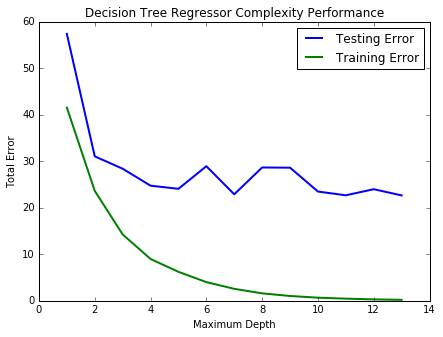

In [57]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on the interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: ** As the max depth increases, the training error approaches zero. This makes sense, since the training error is a function of the depth, and as more parameters are considered, the training data can be fit more accurately. On the other hand, the test error initially decreases quickly but eventually begins to taper and decreases less dramatically. This makes sense, since after a certain point the addition of certain parameters will not greatly help the model, and in some cases it can harm the model.

It appears that a depth of 7 best generalizes the dataset. This is because the testing error seems to be very low at this depth, indicating that the trained model is able to best generalize test data at this depth, preventing against the dangers of underfitting. Further, this depth is not too large, preventing against the dangers of overfitting.

# Model Prediction
In this final section of the project, I will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize the model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance.

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for the model? How does this result compare to the intial intuition?*

In [10]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 7


**Answer: ** The final model has an optimal max depth of 4. This result is lower than my initial intuition, although the reasoning seems sound. Looking at the model complexity graph, the error at a depth of 4 is still low, comparable to that of higher depths. Further, 4 is a low enough depth such that additional parameters are not unnecessarily added. A depth of 4 therefore prevents against both underfitting and overfitting.

## Question 11
*With the parameter-tuned model, what is the best selling price for the client's home? How does this selling price compare to the basic statistics calculated on the dataset?*  

In [66]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer: ** The predicted best selling price for the client's home is $21,630. This value is slightly lower than the mean house price and slightly greater than the median house price. This suggests that the model is fairly accurate in generalizing data, and does not produce outlandish or strange data.

## Question 12 (Final Question):
*In a few sentences, discuss whether this model would be used or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** I would use this model to predict the selling price of future clients' homes in the Greater Boston area. This is because with a depth of 4, the total error for the test data is fairly low, approximately 25. This depth also protects against high bias and high variance (underfitting and overfitting). The model was also optimized using cross-validation and grid search algorithms to find the best parameters for estimation. The number of data points was also sizeable, and when tested on a new client, the predicted value was in an acceptable range. The model serves as a good initial guess as to the selling price of future clients' homes using a variety of significant features to make its decision.

**References**
==============

1. http://www.leadnovo.com/165101996.htm